In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST("", train=True, download=True,
    transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
    transform = transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
    print(data)
    break

In [28]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [21]:
x, y = data[0][0], data[1][0]

print(y)

tensor(9)


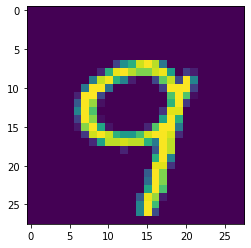

In [31]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

In [35]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [36]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [37]:
import torch.nn as nn
import torch.nn.functional as F

In [44]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_connected_layer_1 = nn.Linear(28*28, 64)
        self.fully_connected_layer_2 = nn.Linear(64, 64)
        self.fully_connected_layer_3 = nn.Linear(64, 64)
        self.fully_connected_layer_4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fully_connected_layer_1(x))
        x = F.relu(self.fully_connected_layer_2(x))
        x = F.relu(self.fully_connected_layer_3(x))
        x = self.fully_connected_layer_4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fully_connected_layer_1): Linear(in_features=784, out_features=64, bias=True)
  (fully_connected_layer_2): Linear(in_features=64, out_features=64, bias=True)
  (fully_connected_layer_3): Linear(in_features=64, out_features=64, bias=True)
  (fully_connected_layer_4): Linear(in_features=64, out_features=10, bias=True)
)


In [57]:
X = torch.rand(28, 28)
X = X.view(1, 28 * 28)
output = net(X)
print(output)

tensor([[-2.2998, -2.3201, -2.2595, -2.3732, -2.4075, -2.2342, -2.3092, -2.3667,
         -2.3031, -2.1742]], grad_fn=<LogSoftmaxBackward>)


In [62]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0070, grad_fn=<NllLossBackward>)
tensor(0.0229, grad_fn=<NllLossBackward>)
tensor(0.1250, grad_fn=<NllLossBackward>)


In [64]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


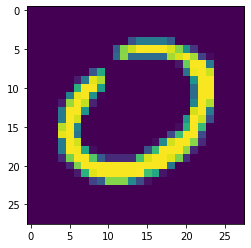

In [71]:
plt.imshow(X[3].view(28, 28))
plt.show()

In [70]:
print(
    torch.argmax(
    net(
        X[3].view([-1, 28*28])
        )[0]
    )
)

tensor(0, grad_fn=<NotImplemented>)
